In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv("/content/Train.csv")
test_df = pd.read_csv("/content/Test.csv")

In [ ]:
df = pd.concat([train_df, test_df])

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
# dropping the rows having NaN values
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8819 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8819 non-null   int64  
 1   Gender           8819 non-null   object 
 2   Ever_Married     8819 non-null   object 
 3   Age              8819 non-null   int64  
 4   Graduated        8819 non-null   object 
 5   Profession       8819 non-null   object 
 6   Work_Experience  8819 non-null   float64
 7   Spending_Score   8819 non-null   object 
 8   Family_Size      8819 non-null   float64
 9   Var_1            8819 non-null   object 
 10  Segmentation     8819 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 826.8+ KB


In [ ]:
df['Segmentation'].value_counts()

D    2388
A    2308
C    2101
B    2022
Name: Segmentation, dtype: int64

In [ ]:
print("Gender: ", df['Gender'].unique())
print("Ever_Married: ", df['Ever_Married'].unique())
print("Graduated: ", df['Graduated'].unique())

Gender:  ['Male' 'Female']
Ever_Married:  ['No' 'Yes']
Graduated:  ['No' 'Yes']


In [ ]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Ever_Married'] = df['Ever_Married'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Graduated'] = df['Graduated'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [ ]:
df['Spending_Score'].replace(to_replace = 'Low', value = 0, inplace = True)
df['Spending_Score'].replace(to_replace = 'Average', value = 1, inplace = True)
df['Spending_Score'].replace(to_replace = 'High', value = 2, inplace = True)

In [ ]:
df['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [ ]:
df['Var_1'].replace(to_replace = 'Cat_1', value = 1, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_2', value = 2, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_3', value = 3, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_4', value = 4, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_5', value = 5, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_6', value = 6, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_7', value = 7, inplace = True)

In [ ]:
df['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [ ]:
df['Segmentation'].replace(to_replace = 'A', value = 0, inplace = True)
df['Segmentation'].replace(to_replace = 'B', value = 1, inplace = True)
df['Segmentation'].replace(to_replace = 'C', value = 2, inplace = True)
df['Segmentation'].replace(to_replace = 'D', value = 3, inplace = True)

In [ ]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,Healthcare,1.0,0,4.0,4,3
2,466315,0,1,67,1,Engineer,1.0,0,1.0,6,1
3,461735,1,1,67,1,Lawyer,0.0,2,2.0,6,1
5,461319,1,1,56,0,Artist,0.0,1,2.0,6,2
6,460156,1,0,32,1,Healthcare,1.0,0,3.0,6,2
...,...,...,...,...,...,...,...,...,...,...,...
2621,467950,0,0,35,1,Entertainment,1.0,0,2.0,6,3
2622,467954,1,0,29,0,Healthcare,9.0,0,4.0,6,1
2623,467958,0,0,35,1,Doctor,1.0,0,1.0,6,0
2625,467961,1,1,47,1,Executive,1.0,2,5.0,4,2


In [ ]:
label ={0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D'}

Text(0.5, 1.08, 'Pair Plot Analysis')

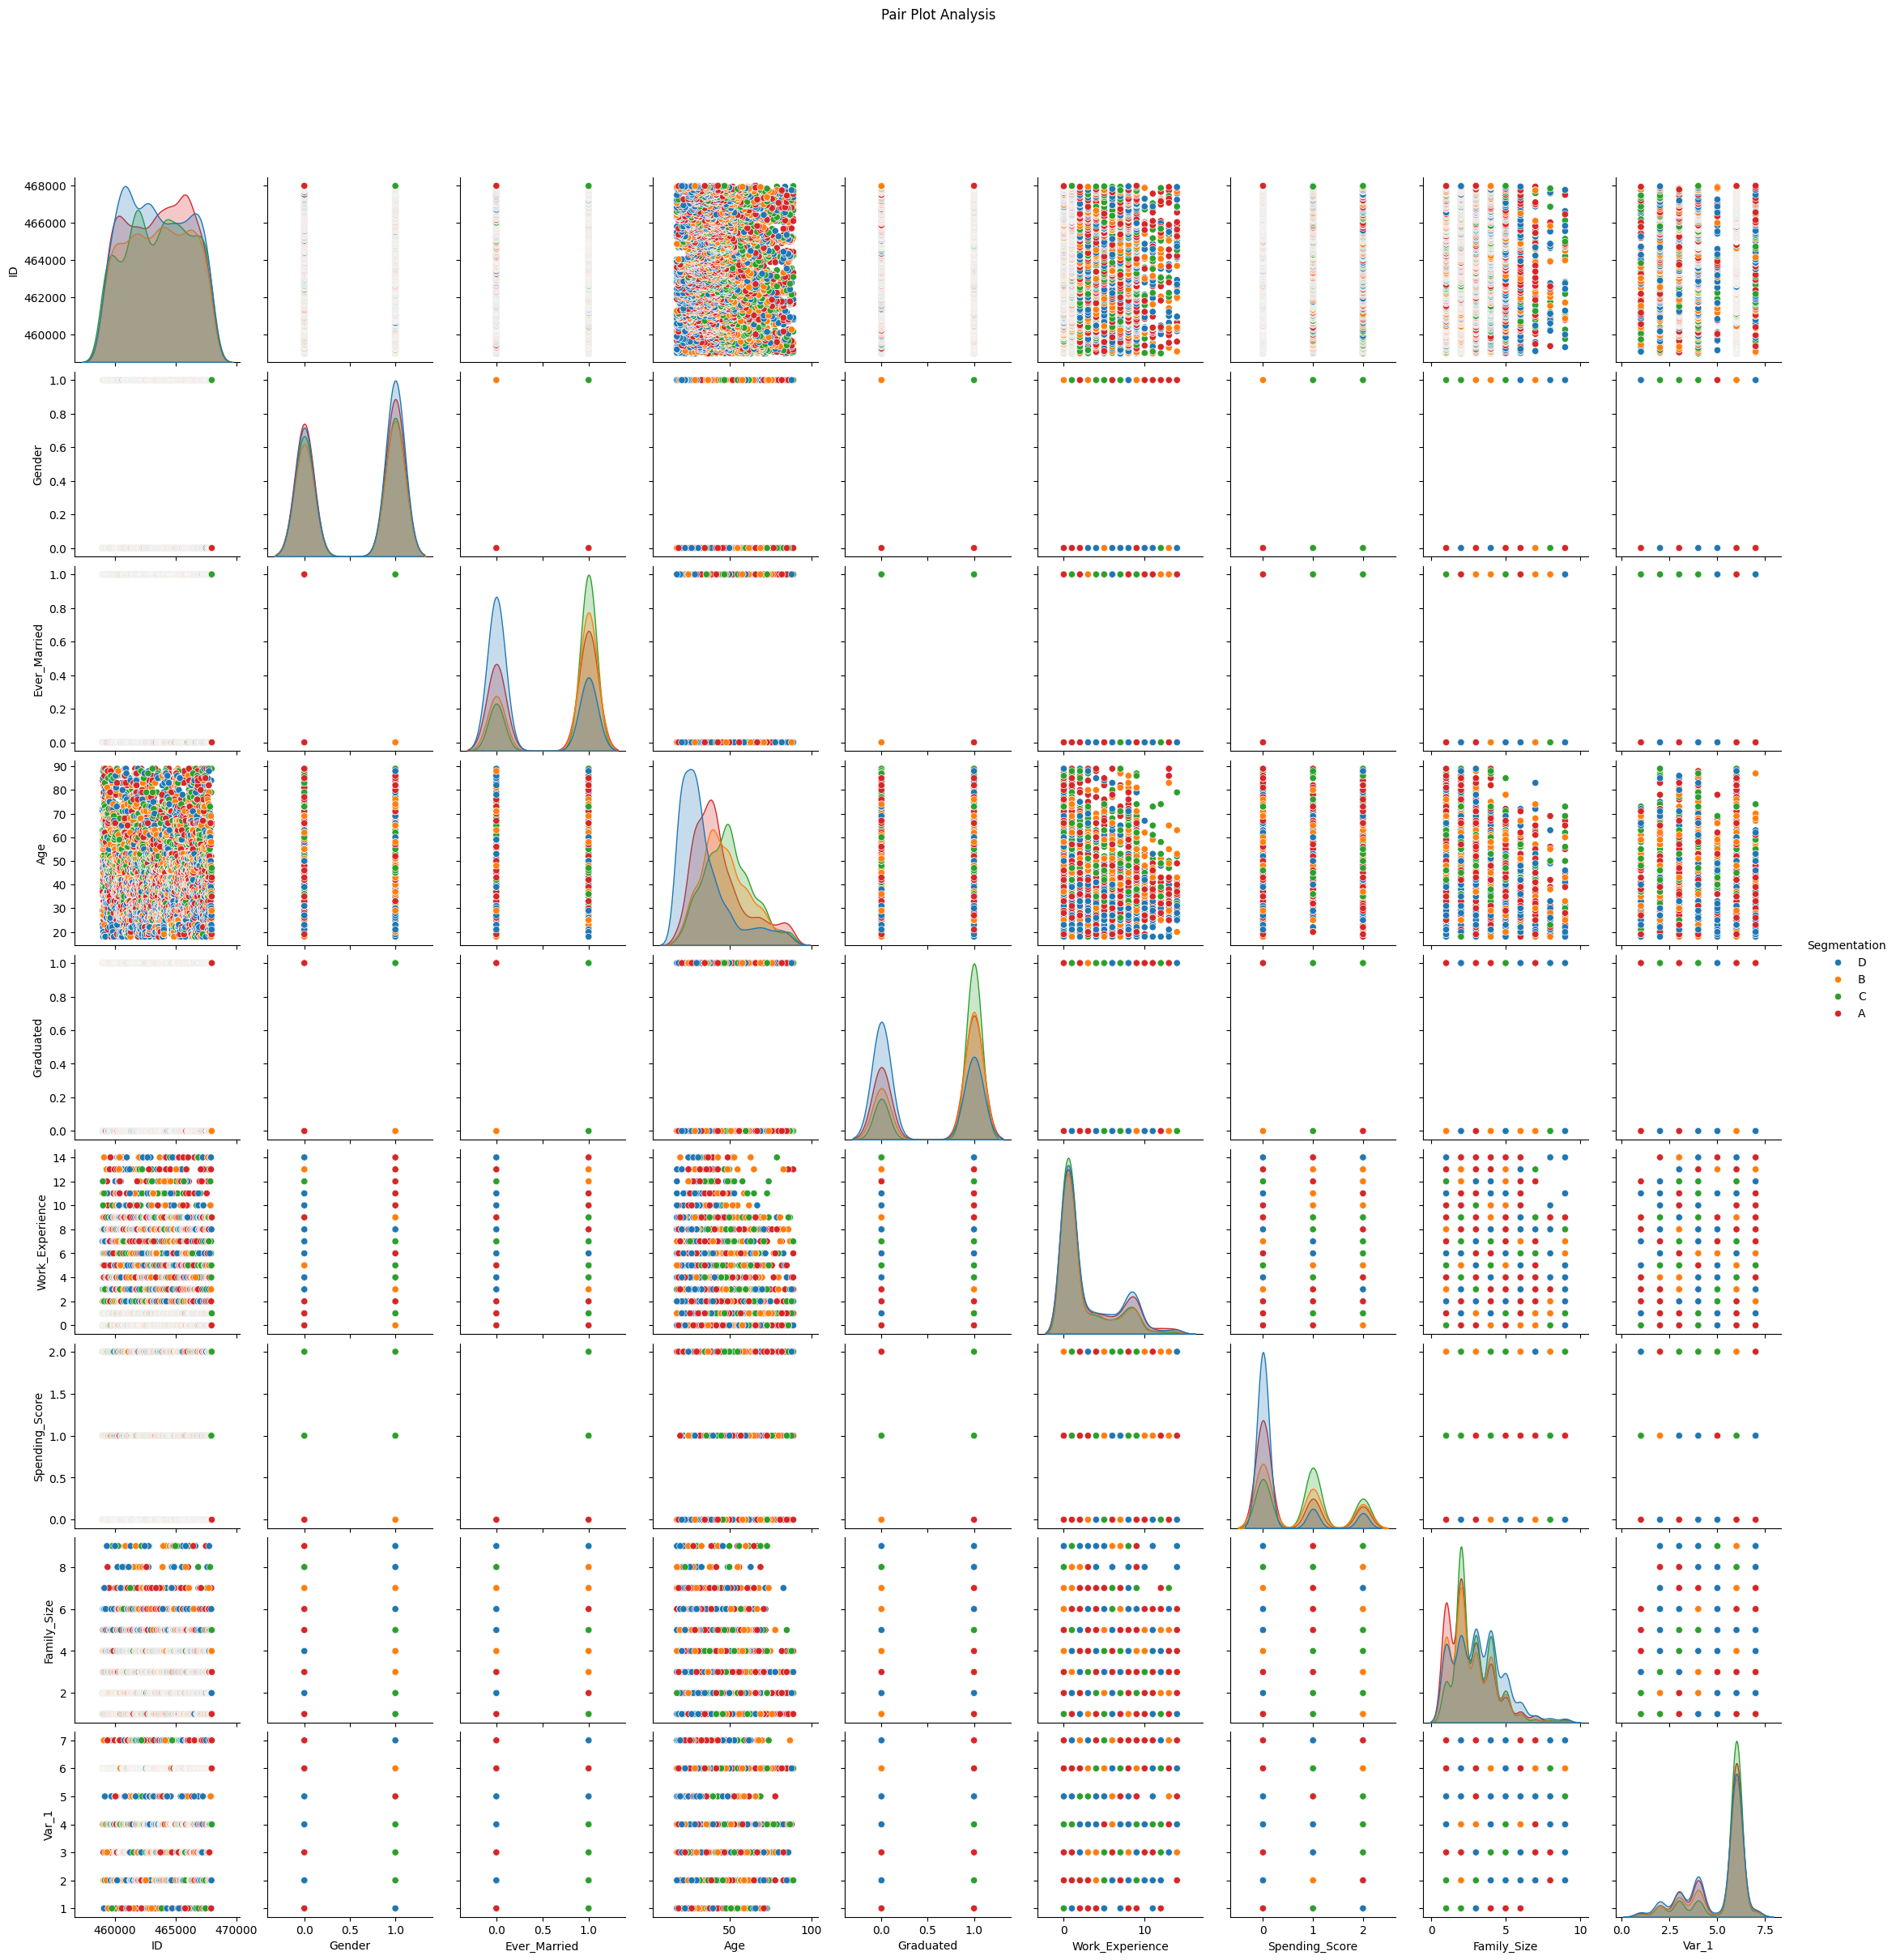

In [ ]:
plotdata = sns.pairplot(df.replace({'Segmentation' : label}), hue = 'Segmentation')
plotdata.fig.suptitle("Pair Plot Analysis", y = 1.08)

In [ ]:
x = df[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']].values
x

array([[ 1.,  0., 22., ...,  0.,  4.,  4.],
       [ 0.,  1., 67., ...,  0.,  1.,  6.],
       [ 1.,  1., 67., ...,  2.,  2.,  6.],
       ...,
       [ 0.,  0., 35., ...,  0.,  1.,  6.],
       [ 1.,  1., 47., ...,  2.,  5.,  4.],
       [ 0.,  0., 43., ...,  0.,  3.,  7.]])

In [ ]:
y = df.iloc[:, 10].values
y

array([3, 1, 1, ..., 0, 2, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [ ]:
print(x_train.shape)

(6173, 8)


In [ ]:
model = LogisticRegression(max_iter = 600)
model.fit(x_train, y_train)

LogisticRegression(max_iter=600)

In [ ]:
y_pred_lr = model.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.4346182917611489


In [ ]:
cr = classification_report(y_test, y_pred_lr)

print("\t\tClassification Report\n" + "--"*28 + "\n", cr)

		Classification Report
--------------------------------------------------------
               precision    recall  f1-score   support

           0       0.35      0.35      0.35       671
           1       0.28      0.10      0.14       613
           2       0.45      0.59      0.51       646
           3       0.52      0.67      0.58       716

    accuracy                           0.43      2646
   macro avg       0.40      0.42      0.40      2646
weighted avg       0.40      0.43      0.40      2646



In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[234  60 152 225]
 [193  59 240 121]
 [110  57 379 100]
 [123  38  77 478]]


<Axes: >

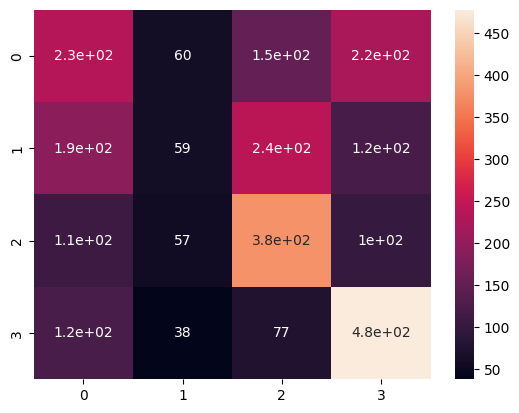

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm,annot=True)

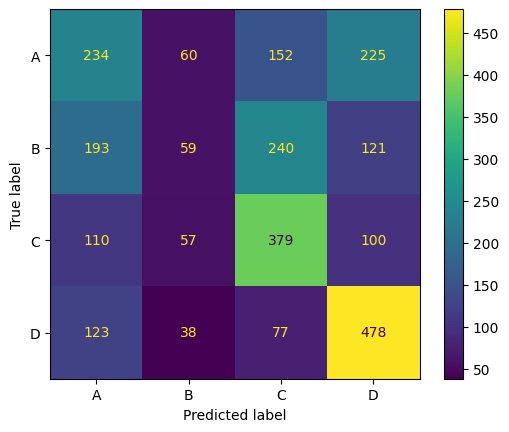

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_lr), display_labels=['A', 'B', 'C', 'D'])
cm_display.plot()
plt.show()

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [ ]:
y_pred_rf = model_rf.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  0.40249433106575966


In [ ]:
cr = classification_report(y_test, y_pred_rf)

print("\t\tClassification Report\n" + "--"*28 + "\n", cr)

		Classification Report
--------------------------------------------------------
               precision    recall  f1-score   support

           0       0.35      0.34      0.34       671
           1       0.30      0.29      0.29       613
           2       0.43      0.43      0.43       646
           3       0.49      0.54      0.52       716

    accuracy                           0.40      2646
   macro avg       0.40      0.40      0.40      2646
weighted avg       0.40      0.40      0.40      2646



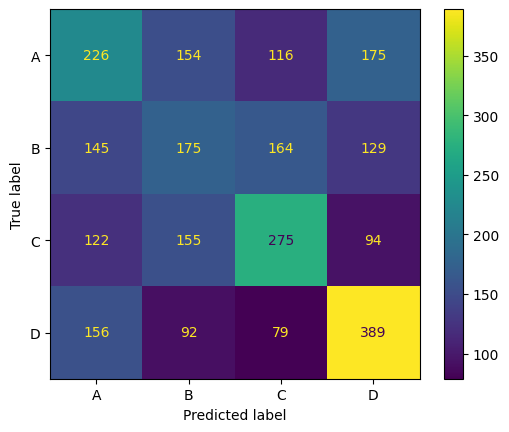

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_rf), display_labels=['A', 'B', 'C', 'D'])
cm_display.plot()
plt.show()